#第7章：詞向量 （English Resource）
本章介紹詞向量（詞嵌入）的相關概念。 編寫程式，以實現下列處理。

#60. 載入詞向量
下載在Google News數據集（大約1,000億個詞）上預訓練得到的詞向量。 該檔包含300萬個單詞與短語的詞向量表示，向量的維度為300。 列印出片語“United States”的詞向量（注意：“United States”以“United_States”的形式存儲）

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!wget "https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz?raw=true"

--2025-05-14 08:26:36--  https://github.com/eyaler/word2vec-slim/blob/master/GoogleNews-vectors-negative300-SLIM.bin.gz?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/eyaler/word2vec-slim/raw/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]
--2025-05-14 08:26:37--  https://github.com/eyaler/word2vec-slim/raw/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/eyaler/word2vec-slim/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]
--2025-05-14 08:26:37--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/refs/heads/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubu

In [2]:
from gensim.models import keyedvectors
#把詞向量讀入模型 有點像df的感覺
model=keyedvectors.load_word2vec_format('./GoogleNews-vectors-negative300-SLIM.bin.gz',binary=True)

In [3]:
model['U.S.']

array([ 6.88424241e-03, -3.02159064e-03,  5.28311096e-02,  6.23008385e-02,
       -9.56940874e-02, -3.31440456e-02, -8.27355161e-02, -1.17748585e-02,
        4.63518240e-02, -4.58534174e-02, -9.51956809e-02,  2.00920203e-03,
        8.47291425e-02, -2.23037004e-02, -5.58215491e-02, -3.00290044e-02,
       -7.42625967e-02, -2.23037004e-02, -1.71950310e-02, -3.88757214e-02,
       -1.00678153e-01,  3.56360786e-02, -7.27673769e-02, -6.10548221e-02,
       -6.69733994e-03,  6.20516352e-02, -3.10258176e-02, -5.88742923e-03,
       -2.61663515e-02,  1.17623985e-01,  1.40550688e-01, -1.23106457e-01,
       -8.47291425e-02, -6.77833110e-02,  1.88148525e-02, -2.77861729e-02,
       -8.28601141e-03, -4.08693515e-02, -6.60388870e-03,  1.58867128e-02,
        1.80672435e-03, -1.81918442e-02,  8.32339227e-02,  6.35468513e-02,
       -3.56360786e-02,  1.06160626e-01, -1.78180393e-02,  9.56940874e-02,
       -2.69139614e-02,  5.78151792e-02,  1.15879560e-02,  6.05564155e-02,
        2.18052939e-02, -

#61. 詞語相似度
計算“United States”與“U.S.” 之間的餘弦相似度。

In [8]:
print(model.similarity('cat',"dog"))
print(model.similarity('U.S.','U.K.'))

0.76094574
0.30386662


#62. 最相似的10個詞
找出與“United States”餘弦相似度最高的10個詞，並輸出其相似度的數值。

In [9]:
model.most_similar('U.S.',topn=10)

[('American', 0.5309483408927917),
 ('Canadian', 0.5234513878822327),
 ('US', 0.5224753022193909),
 ('British', 0.49832218885421753),
 ('foreign', 0.4743579626083374),
 ('European', 0.46938517689704895),
 ('China', 0.46129631996154785),
 ('Canada', 0.4573511481285095),
 ('overseas', 0.44835713505744934),
 ('America', 0.4439365863800049)]

#63. 基於向量加法的詞彙類比
用“Spain”的詞向量減去“Madrid”的詞向量，再加上“Athens”的詞向量，得到一個新的向量。 找出與該向量相似度最高的10個單詞或片語，並輸出其相似度的數值。

In [10]:
model.most_similar(positive=['Spain','Athens'],negative=['Madrid'],topn=10)

[('Greece', 0.6898481845855713),
 ('Greeks', 0.545068621635437),
 ('Lithuania', 0.5166866779327393),
 ('Iraklion', 0.5146791934967041),
 ('Greek', 0.5137193202972412),
 ('Latvia', 0.47279995679855347),
 ('Macedonia', 0.46674486994743347),
 ('Thessaloniki', 0.46563127636909485),
 ('Cyprus', 0.4639217257499695),
 ('ATHENS', 0.4612146019935608)]

#64. 詞彙類比實驗
下載詞彙類比評估數據集，並按vec（第二列的詞） - vec（第一列的詞） + vec（第三列的詞）的方式計算新的向量。 求出與該向量相似度最高的單詞，並將該單詞及其相似度數值追加進每一行的末尾。

In [11]:
with open('./questions-words.txt','r') as f1, open('./questions-word-add.txt','w') as f2:
  for line in f1:
    line=line.split()
    if line[0]==':':
      category=line[1]
      print(category)
    else:
      try:
        word, cos=model.most_similar(positive=[line[1],line[2]],negative=[line[0]],topn=1)[0]
      except:
        continue
      f2.write(''.join([category]+line+[word,str(cos)+'\n']))


capital-common-countries
capital-world
currency
city-in-state
family
gram1-adjective-to-adverb
gram2-opposite
gram3-comparative
gram4-superlative
gram5-present-participle
gram6-nationality-adjective
gram7-past-tense
gram8-plural
gram9-plural-verbs


#65. 詞彙類比任務的準確率
對於第64問所得的結果，計算其語義類比（semantic analogy）與語法類比（syntactic analogy）的正確率。

In [12]:
with open('./questions-words-add.txt','r')as f:
  sem_cnt=0
  sem_cor=0
  syn_cnt=0
  syn_cor=0
  for line in f:
    line=line.split()
    if not line[0].startswith('gram'):
      sem_cnt+=1
      if line[4]==line[5]:
        sem_cor+=1
    else:
      syn_cnt+=1
      if line[4]==line[5]:
        syn_cor+=1
  print('語意類比semantic accuracy:',sem_cor/sem_cnt)
  print('語法類比syntactic accuracy:',syn_cor/syn_cnt)

語意類比semantic accuracy: 0.7747682677260143
語法類比syntactic accuracy: 0.7430424971793907


#66. 在WordSimilarity-353數據集上評估
從The WordSimilarity-353 Test Collection下載測試數據。 計算以下兩組數據之間的斯皮爾曼等級相關係數（spearman's rank correlation coefficient）：

通過詞向量計算所得的相似度排名;
通過人類評估所得的相似度排名。

In [11]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353

--2025-05-14 08:27:25--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2025-05-14 08:27:25--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 173.236.137.139
Connecting to gabrilovich.com (gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip.1’

wordsim353.zip.1    100%[===================>]  22.71K  --.-KB/s    in 0.06s   

2025-05-14 08:27:26 (385 KB/s) - ‘wordsim353.zip.1’ saved [23257/23257]

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  in

In [12]:
!head -10 './combined.csv'

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [13]:
ws353=[]
with open('./combined.csv','r') as f:
  next(f) #用來跳過表頭
  for line in f:
    line= [s.strip() for s in line.split(',')]
    line.append(model.similarity(line[0],line[1]))
    ws353.append(line) #往後加元素
#確認
for i in range(5):
  print(ws353[i])

['love', 'sex', '6.77', 0.26393774]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 1.0]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]


In [14]:
import numpy as np
from scipy.stats import spearmanr
human=np.array(ws353).T[2]
w2v=np.array(ws353).T[3]
correlation,pvalue=spearmanr(human,w2v)
print(f'Spearman correlation coefficient: {correlation:.3f}, p-value: {pvalue}')

Spearman correlation coefficient: 0.685, p-value: 3.3287848950139166e-50


#67. k-means聚類
提取所有與國名相關的詞向量，並使用k-means演算法進行聚類（k=5）。

In [4]:
#取得國家
countries=set()
with open('./questions-words-add.txt','r') as f:
  for line in f:
    line=line.split()
    if line[0] in ('capital-common-countries','capital-wolrd'):
      countries.add(line[2])
    elif line[0] in ('currency','gram6-nationality-adjective'):
      countries.add(line[1])
countries=list(countries)
print(countries)
countries_vec=[model[country] for country in countries]

['Vietnam', 'Latvia', 'Romania', 'Chile', 'Iceland', 'Switzerland', 'Hungary', 'Lithuania', 'Australia', 'Argentina', 'Brazil', 'Mexico', 'England', 'Sweden', 'Iran', 'Algeria', 'Korea', 'France', 'Canada', 'Armenia', 'Bulgaria', 'Croatia', 'Peru', 'Cambodia', 'Angola', 'Israel', 'Cuba', 'Netherlands', 'China', 'Poland', 'Albania', 'Ireland', 'Malaysia', 'Greece', 'Russia', 'Nigeria', 'Colombia', 'Malta', 'India', 'Spain', 'Germany', 'USA', 'Portugal', 'Belarus', 'Afghanistan', 'Japan', 'Austria', 'Egypt', 'Denmark', 'Thailand', 'Iraq', 'Pakistan', 'Macedonia', 'Slovakia', 'Finland', 'Ukraine', 'Europe', 'Italy', 'Norway']


In [16]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5).fit(countries_vec)
for i in range(5):
  cluster=np.where(kmeans.labels_==i)[0]
  print('cluster',i)
  print(' '.join([countries[k] for k in cluster]))

cluster 0
Brazil England Angola China Nigeria Spain Korea Italy Mexico Algeria Canada India Cuba Argentina Colombia Peru Chile Portugal USA Australia
cluster 1
France Germany Sweden Denmark Finland Netherlands Switzerland Norway Europe Austria
cluster 2
Russia Macedonia Lithuania Latvia Armenia Israel Belarus Bulgaria Egypt Ukraine
cluster 3
Vietnam Afghanistan Iran Pakistan Iraq
cluster 4
Croatia Poland Iceland Malaysia Japan Thailand Slovakia Ireland Romania Malta Greece Cambodia Albania Hungary


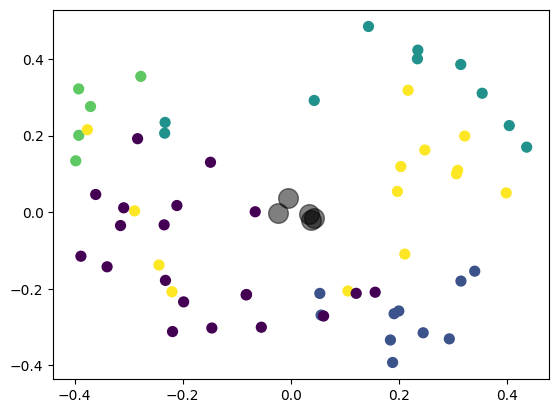

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
aa=pd.DataFrame(countries_vec)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(aa)
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmeans.labels_,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
plt.show()

#68. Ward聚類法
提取所有與國名相關的詞向量，並使用離差平方和（Ward's method）度量距離、進行分層聚類。 使用樹枝狀圖（Dendrogram）對聚類結果進行可視化。

<function matplotlib.pyplot.show(close=None, block=None)>

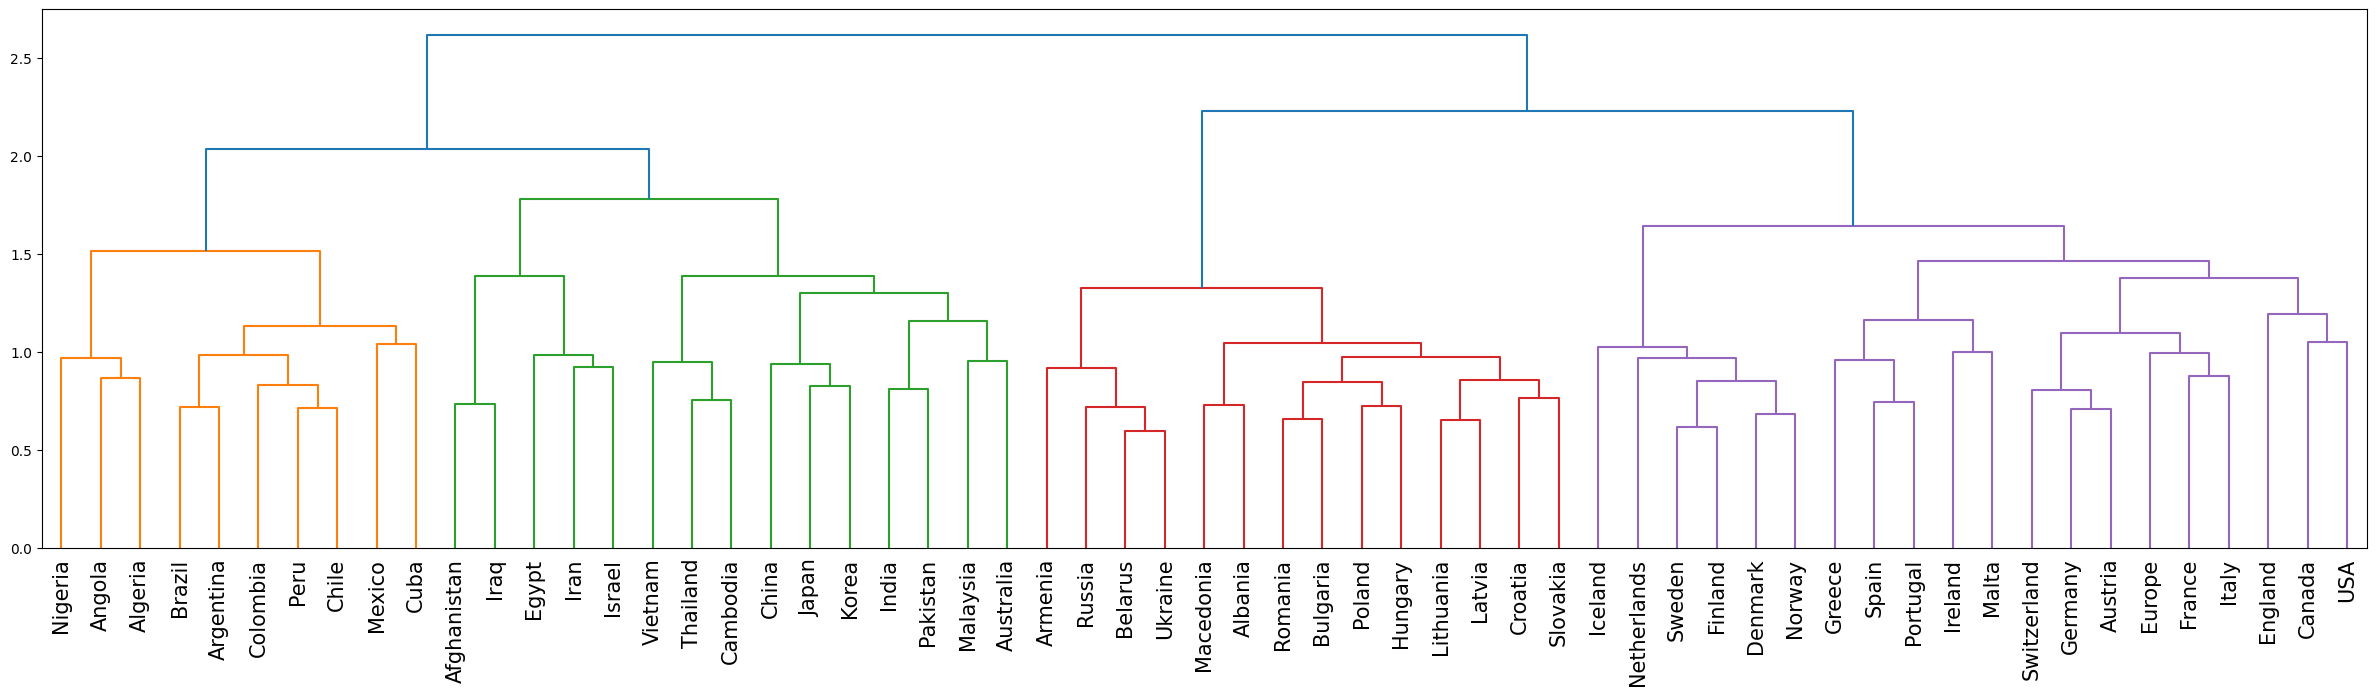

In [18]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(30,7))
Z=linkage(countries_vec,method='ward')
dendrogram(Z,labels=countries)
ax=plt.gca()
ax.tick_params(axis='x',which='major',labelsize=15)
plt.show

#69. t-SNE 視覺化
使用t-SNE，在向量空間上對所有與國名相關的詞向量進行可視化。

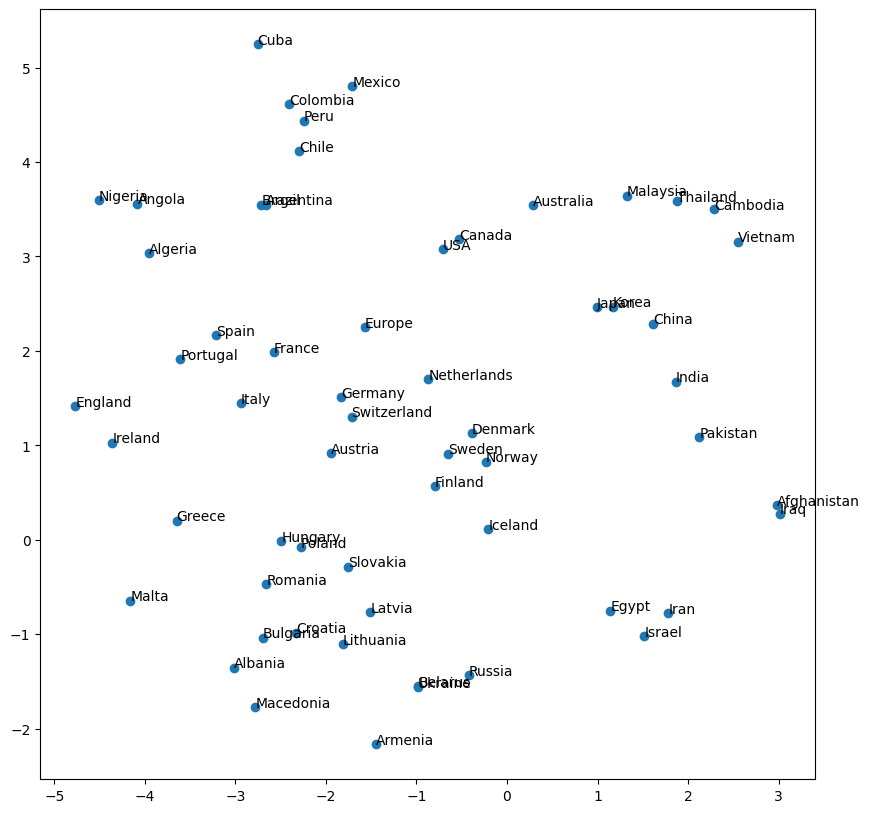

In [6]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
embedded=TSNE(n_components=2, random_state=123).fit_transform(np.array(countries_vec))
plt.figure(figsize=(10,10))
plt.scatter(np.array(embedded).T[0],np.array(embedded).T[1])#畫點
for(x,y),name in zip(embedded,countries):#畫label
  plt.annotate(name,(x,y),fontsize=10)
plt.show()